# Figure 1
Aim here is just to produce a likelihood surface for a single simulated dataset.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import matplotlib.ticker

%config InlineBackend.figure_format = 'retina'

import sys
print("Python version:\n{}\n".format(sys.version))

%run set_plot_options.py

from model import get_response, calc_log_likelihood
from adaptive_experiment import make_dataset, plot_data
from parameters import *
from discount_functions import rachlin, rachlin_kappa

Python version:
3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]



Set the random seed, for reproducibility

In [2]:
np.random.seed(seed=353485)

In [3]:
def plot_data_and_df(ax, data, discount_func, true_params):
    plot_data(data, ax)

    # plot true discount function
    delays = np.linspace(0, max(data['DB']), 500)
    ax.plot(delays, discount_func(delays, true_params), label='indifference curve')
    ax.legend()
    
    ax.set_xlim([0, 365+10])
    ax.set_ylim([0, 1])

Define true parameters we'll use and create 2D parameter space objects for the Rachlin $(s, k)$ and the modified Rachlin $(s, \kappa)$ functions.

In [4]:
true_s = 0.7
true_k = np.exp(-3)
true_kappa = true_k**(1/true_s)

In [5]:
k = Param(r'$k$', r'$\rm{days}^{-s}$', true_value=true_k, xi=np.logspace(-2,-1, num=90))
s = Param(r'$s$', 'no units', true_value=true_s, xi=np.linspace(0.4, 1, num=95))
ks_space = ParamSpace2D([s, k])

kappa = Param(r'$\kappa$', r'$\rm{days}^{-1}$', true_value=true_kappa, xi=np.logspace(-2,-1, num=90))
kappa_s_space = ParamSpace2D([s, kappa])

Create a single dataset

In [6]:
discount_func = rachlin
true_params = ks_space.true_params
 
data = make_dataset(discount_func, ks_space.true_params)

Grid approximation with the Rachlin function

In [7]:
ks_func = lambda params: calc_log_likelihood(data, rachlin, params)
ks_space.grid_evaluate(ks_func)

Grid approximation with the modified Rachlin function

In [8]:
kappa_s_func = lambda params: calc_log_likelihood(data, rachlin_kappa, params)
kappa_s_space.grid_evaluate(kappa_s_func)

Generate figure

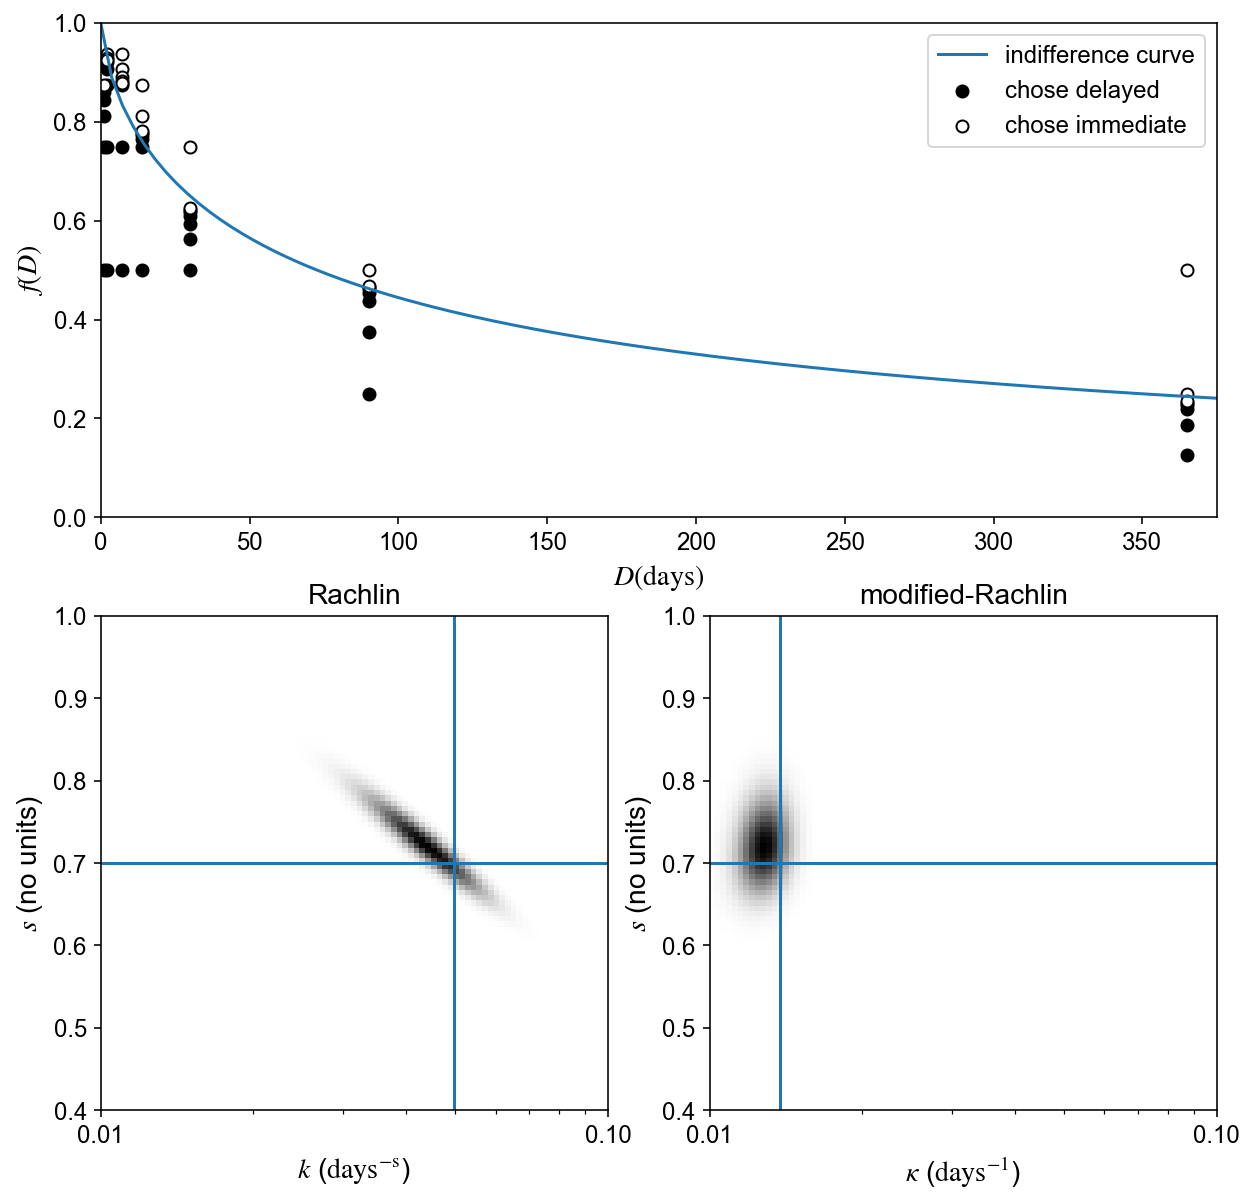

In [9]:
fig1 = plt.figure(figsize=(FIG_WIDTH_INCHES, FIG_WIDTH_INCHES))
gs = gridspec.GridSpec(2, 2)


# plot data
ax1 = fig1.add_subplot(gs[0,:])
plot_data_and_df(ax1, data, discount_func, true_params)


# plot rachlin
ax2 = fig1.add_subplot(gs[1,0])
ks_space.plot(ax2, xscale='log')
ax2.set_title('Rachlin')
# adjust axis ticks
ax2.set_xticks((0.01, 0.1))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())


# plot modified rachlin
ax3 = fig1.add_subplot(gs[1,1])
kappa_s_space.plot(ax3, xscale='log')
ax3.set_title('modified-Rachlin')
# adjust axis ticks
ax3.set_xticks((0.01, 0.1))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

ax2.title.set_size(BIGGER_SIZE)
ax3.title.set_size(BIGGER_SIZE)

#plt.show()
fig1.savefig("Figure1.pdf", bbox_inches='tight', dpi=300)